# Actividad 3 Módulo 6

#Observación: 
Se acordó con el docente que las actividades 3 sería reemplaza por la presente actividad porque en plataforma no se cuenta con información suficiente para su realización.

#Preguntas guia

#Dendrogramas
* Es un tipo de gráfico que muestra la estructura de agrupación de datos. Se utiliza para visualizar cómo los elementos se agrupan entre sí de forma jerárquica. 
En el dendrograma, los objetos similares se agrupan en ramas y las ramas se fusionan a medida que se van formando grupos más grandes. La altura de las fusiones 
en el dendrograma indica qué tan diferentes son los grupos. Es útil para comprender las relaciones de agrupación en los datos y encontrar patrones o subgrupos.

#Cluster
* En términos simples, es un grupo o conjunto de elementos similares. La isea es agrupar los objetos similares en base a sus características, esto crea clusters. 
Cada cluster representa un grupo de objetos que comparten ciertas similitudes entre sí. 
El objetivo del algoritmo de clustering es identificar y agrupar automáticamente los elementos similares en conjuntos separados, lo que permite poder entender mejor los datos y encontrar patrones ocultos.

#Agrupación jerárquica
* Es un método de análisis de datos que busca agrupar elementos similares en diferentes niveles de jerarquía. Se representa mediante un árbol o dendrograma, en el que cada nivel representa un grupo o clúster. Se emplea para explorar la estructura de los datos y no requiere conocer de antemano el número de grupos que lo conforman. 
Es principalmente útil para visualizar cómo se agrupan los elementos y facilita la interpretación de los resultados.

In [42]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import SilhouetteVisualizer

#Para esta sección, siga los pasos para crear la clasificación:
#Para un grupo de datos simulados, use la siguiente función:

In [43]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering y representa su dendograma con la función dendrogram 
    de scipy.cluster.hierarchy
    '''
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # nodo hoja
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

#Nota: no se utiliza función por presentar los siguientes errores.

ImportError: cannot import name 'AgglomerativeClustering' from 'scipy.cluster.hierarchy' (/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py)

AttributeError: 'AgglomerativeClustering' object has no attribute 'children_'

In [44]:
# Dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [45]:
# datos 
X = iris_df.drop(['target'], axis=1)
# Normalize the input
X = X / X.max()

# Para la siguiente clasificación construya un dendrograma, con distintas métricas.

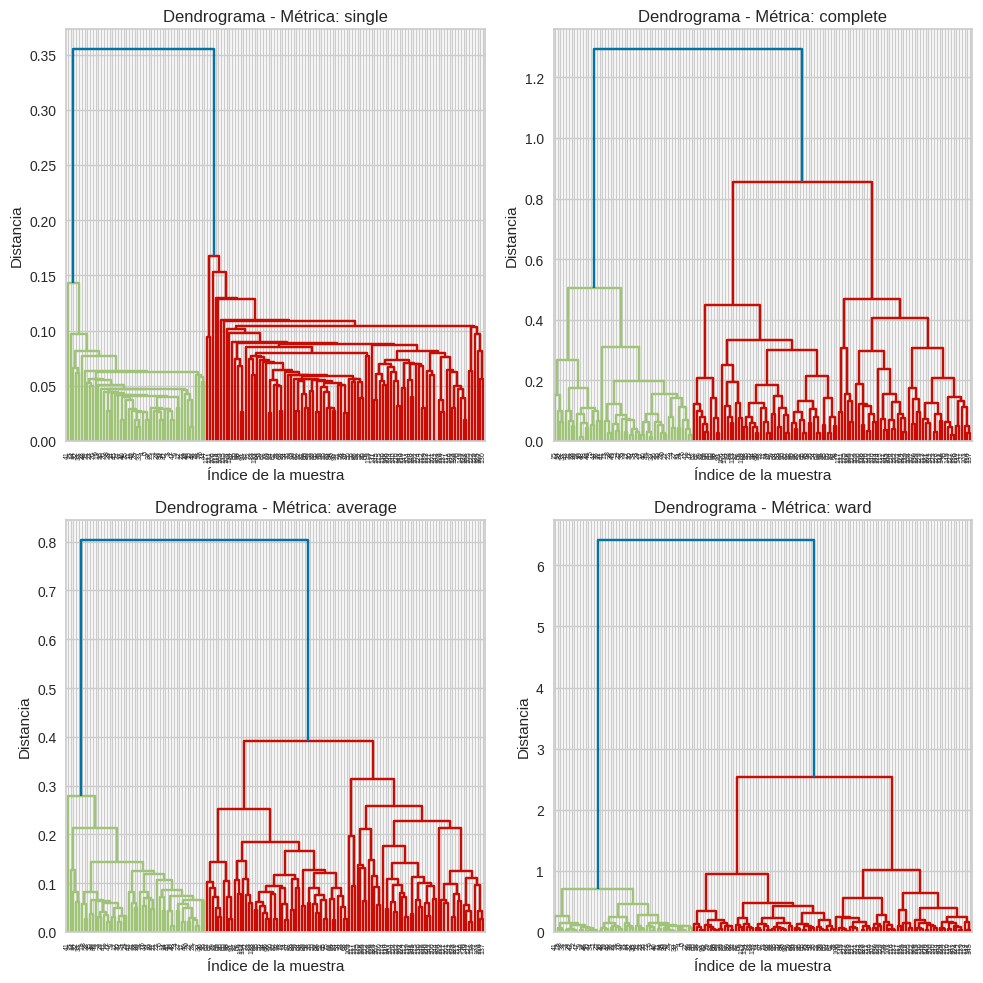

In [46]:
# Generar la matriz de enlace con distintas métricas
methods = ['single', 'complete', 'average', 'ward']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, method in enumerate(methods):
    Z = linkage(X, method)
    ax = axes[i // 2, i % 2]
    ax.set_title(f'Dendrograma - Métrica: {method}')
    ax.set_xlabel('Índice de la muestra')
    ax.set_ylabel('Distancia')
    dendrogram(Z, ax=ax)

plt.tight_layout()
plt.show()

#Establezca el k adecuado para estos datos.

In [47]:
# SSE scores
sse_scores = []
silhouette_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)

for k in k_values:
    # Fit the k-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

    # Calculate Silhouette score
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

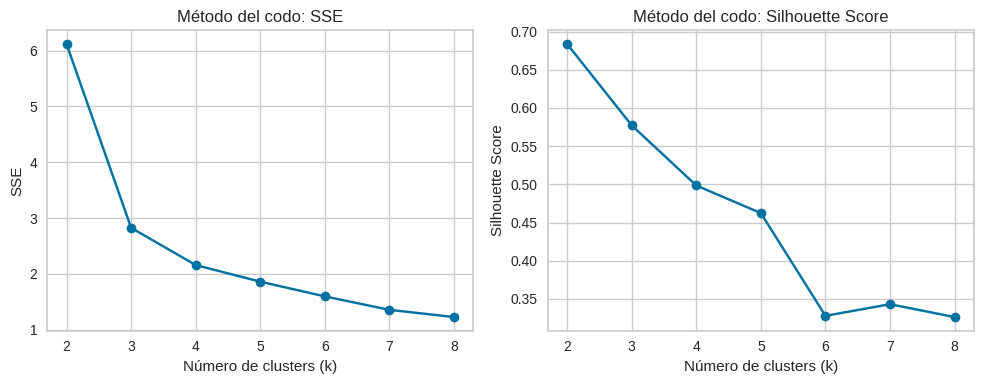

In [48]:
# Plot SSE and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(k_values, sse_scores, marker='o')
ax[0].set_xlabel('Número de clusters (k)')
ax[0].set_ylabel('SSE')
ax[0].set_title('Método del codo: SSE')

ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_xlabel('Número de clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Método del codo: Silhouette Score')

plt.tight_layout()

#Tome la decisión por medio de “índices silhouette”

In [49]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
km.fit_predict(X)
#
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.577


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


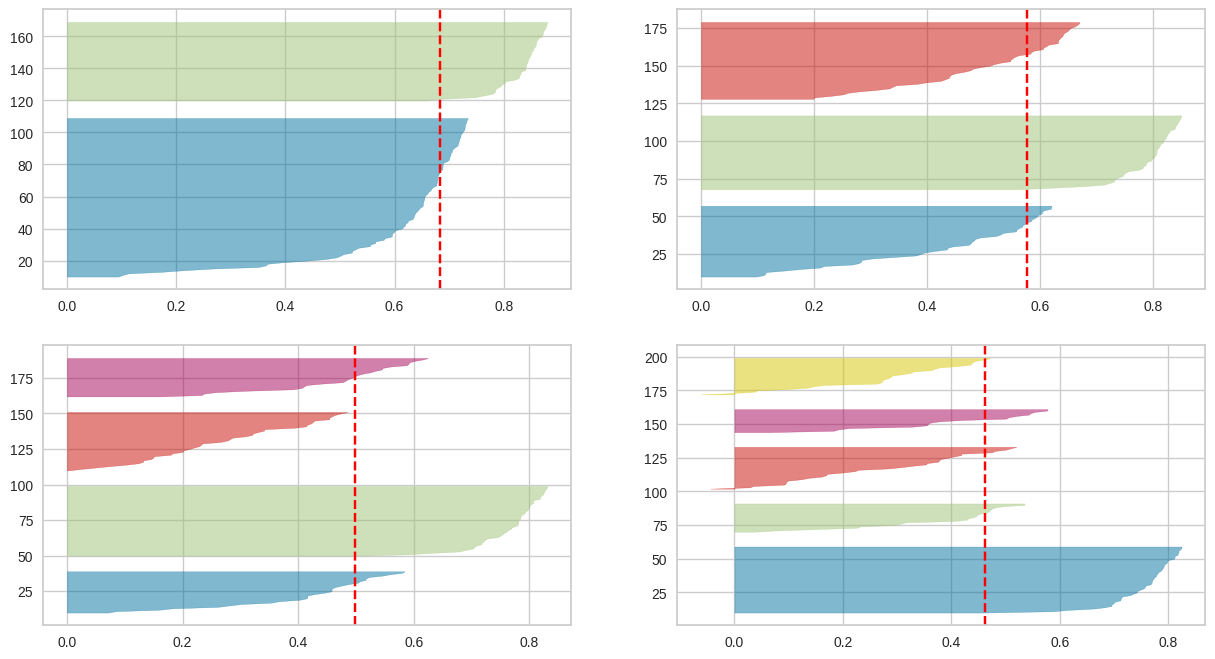

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)